In [1]:
#Importing Library
import numpy as np   # pour tout ce qui est math
import pandas as pd  # pour les dataframes
import matplotlib.pyplot as plt  # pour les graphiques
from sklearn.model_selection import train_test_split # pour séparer les données en train et test
from sklearn.neighbors import KNeighborsClassifier # pour le modèle KNN
from sklearn.datasets import load_digits # pour charger les données de digits
from sklearn.metrics import confusion_matrix # pour la matrice de confusion

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Chargement des données
digits = load_digits() # chargement des données
X = digits.data # les données   
y = digits.target # les étiquettes  
#or X,y = digits.data, digits.target

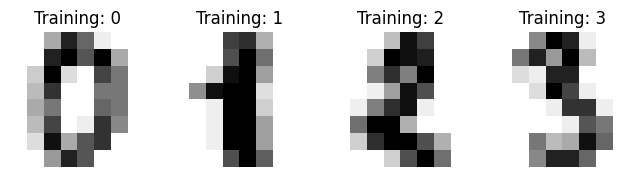

In [3]:
#Visualisation des données image & target
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [6]:
#Division des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% train, 20% test

In [7]:
#Création du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5) # initialisation du modèle
knn.fit(X_train, y_train) # apprentissage du modèle

KNeighborsClassifier()

In [9]:
#Le Taux de précision
score = knn.score(X_test, y_test) # évaluation du modèle
print('Taux de précision :', score) # affichage du taux de précision

Taux de précision : 0.9972222222222222


In [10]:
#Tester k de 1 à 20
nieghbors = np.arange(1, 21)  # k de 1 à 20
train_accuracy = np.empty(len(nieghbors))   # initialisation de la précision sur le train
test_accuracy = np.empty(len(nieghbors))   # initialisation de la précision sur le test

for i,k in enumerate(nieghbors) :  # boucle sur les valeurs de k
    
    knn = KNeighborsClassifier(n_neighbors=k) # initialisation du modèle
    knn.fit(X_train, y_train) # apprentissage du modèle
    train_accuracy[i] = knn.score(X_train, y_train) # précision sur le train
    test_accuracy[i] = knn.score(X_test, y_test) # précision sur le test

In [12]:
print(test_accuracy) # affichage de la précision sur le test

[0.99166667 0.98888889 0.99722222 0.99722222 0.99722222 0.99722222
 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222
 0.99722222 0.99722222 0.99166667 0.99166667 0.99166667 0.99166667
 0.98611111 0.98333333]


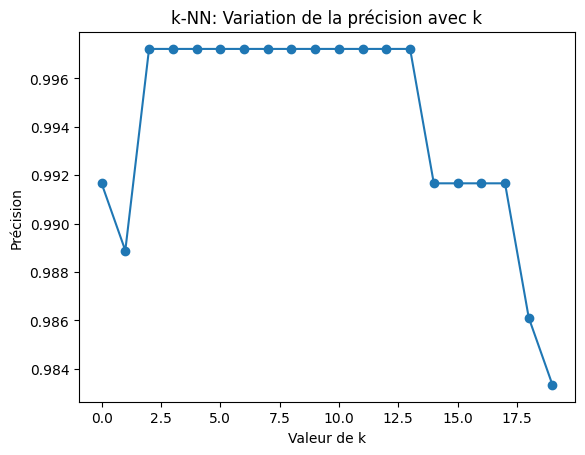

In [13]:
#Visualisation de la précision
plt.title('k-NN: Variation de la précision avec k') # titre
plt.plot(test_accuracy, '-o') # précision sur le test
plt.xlabel('Valeur de k') # axe des abscisses
plt.ylabel('Précision') # axe des ordonnées
plt.show() # affichage du graphique

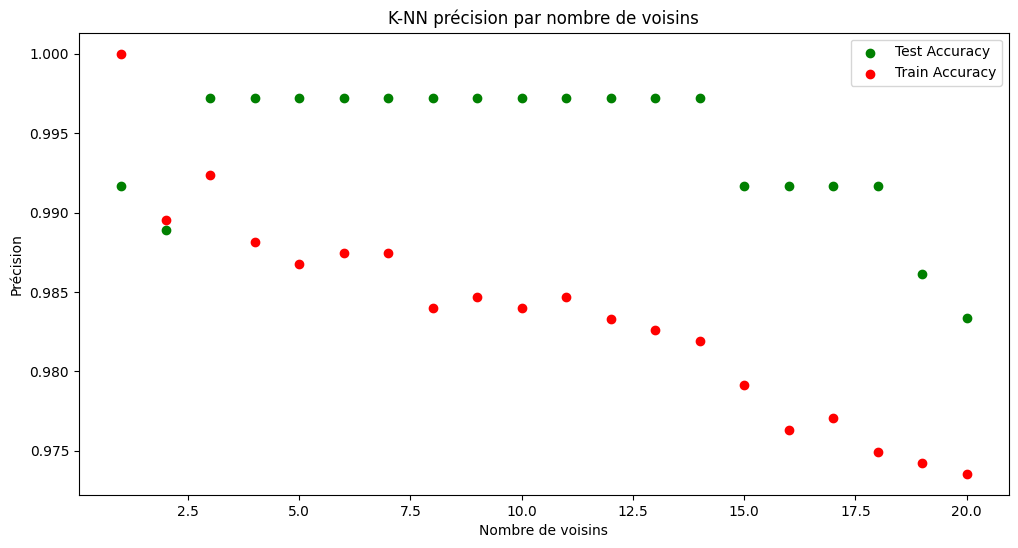

In [16]:
#visualisation taux d'apprentissage et test (2eme méthode)
plt.figure(figsize=(12,6))  # taille du graphique
plt.title('K-NN précision par nombre de voisins')  # titre
plt.scatter(nieghbors, test_accuracy, label='Test Accuracy', color='green')  # précision sur le train
plt.scatter(nieghbors, train_accuracy, label='Train Accuracy', color='red')  # précision sur le test
plt.legend()  # légende
plt.xlabel('Nombre de voisins')  # axe des abscisses
plt.ylabel('Précision')  # axe des ordonnées
plt.show()  # affichage du graphique

In [17]:
y_pred = knn.predict(X_test) # prédiction sur le test

In [18]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred) # matrice de confusion
print(cm) # affichage de la matrice de confusion

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  1  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  0  0  1  0  0 30  0]
 [ 0  1  0  0  0  1  0  0  0 32]]


In [19]:
np.bincount(y_test) # nombre d'occurences de chaque classe dans y_test

array([40, 45, 37, 28, 35, 36, 42, 31, 32, 34], dtype=int64)